# Llamadas gratis via API a distintos LLMs  

Este es un resumen de cómo llamar a varios LLMs distintos via API de forma gratiuta. Lo haremos a través de las páginas https://openrouter.ai/ y https://console.groq.com/.  

## Con https://openrouter.ai/

En primer lugar, tendremos que crearnos una cuenta. Una vez hecho esto, vamos al buscador y buscamos alguno de los modelos gratis:  
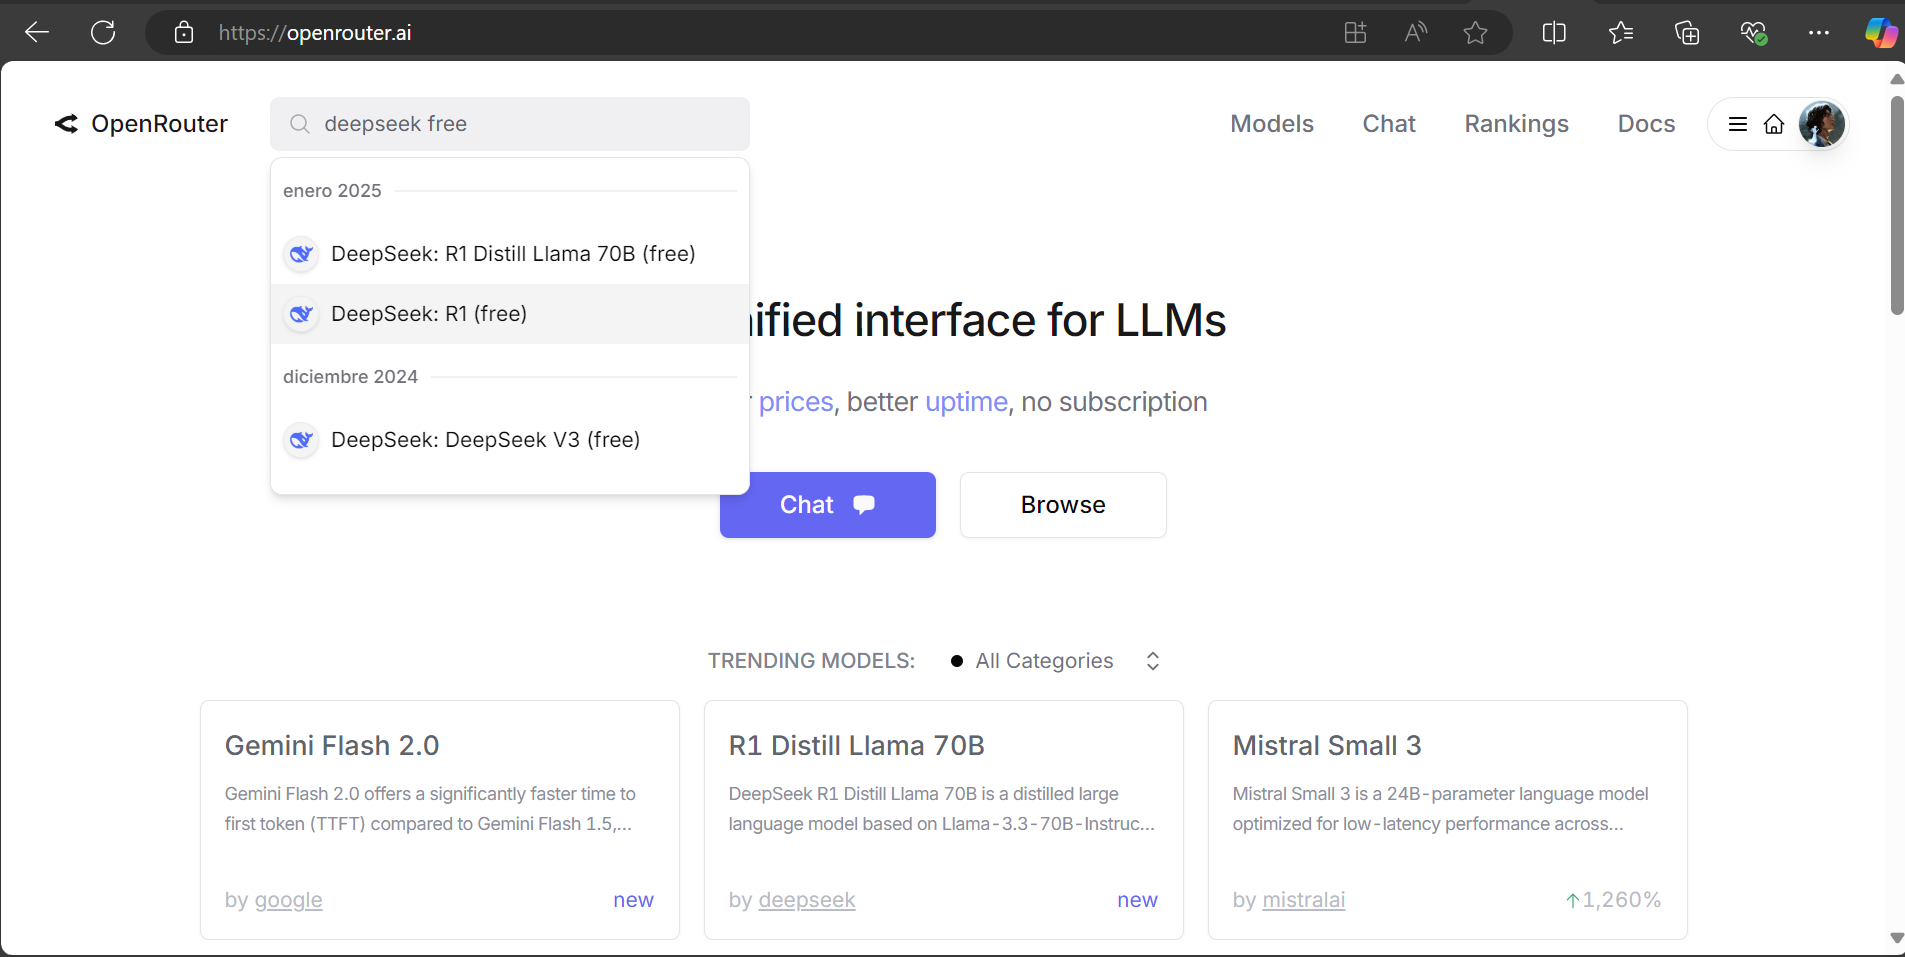  

Algunos de los modelos gratis que hay son:

* Qwen: Qwen VL Plus (free)  
* DeepSeek: R1 (free)  
* Google: Gemini 2.0 Flash Thinking Experimental (free)  
* Meta: Llama 3.3 70B Instruct (free)  
* Google: Gemma 2 9B (free)  
* Mistral: Mistral 7B Instruct (free)  

Una vez escogido el modelo, creamos una API KEY:  
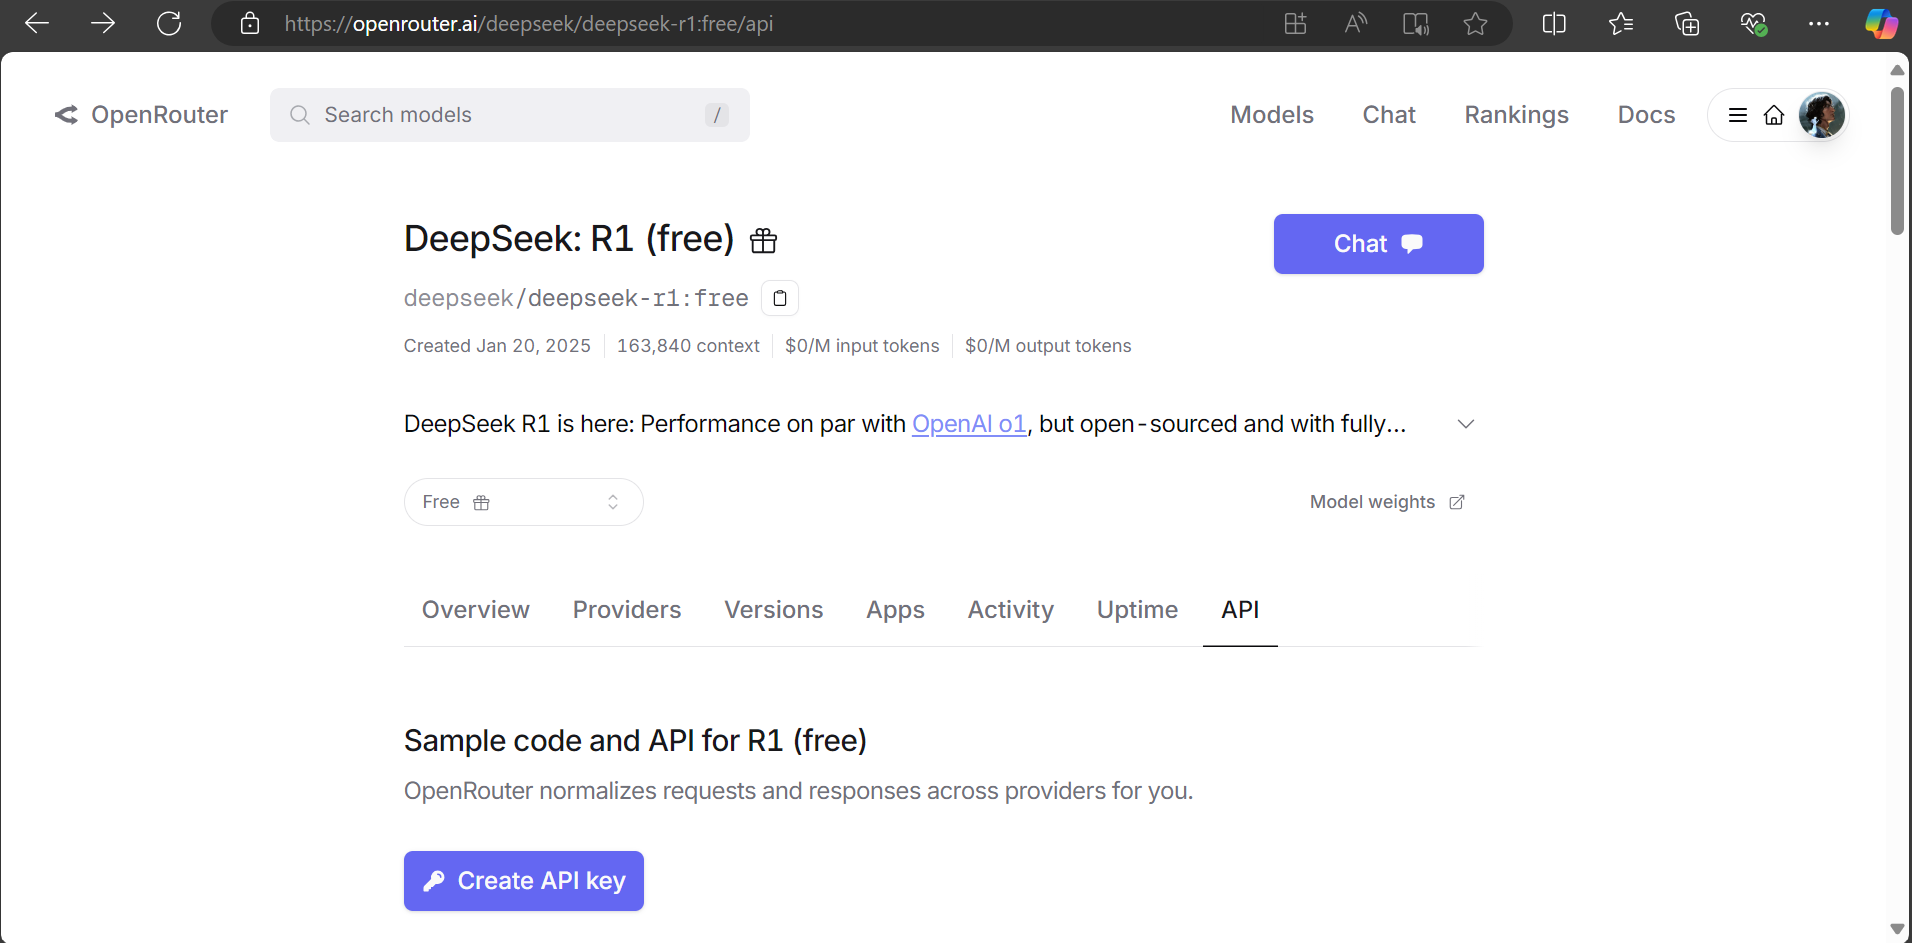  

Más abajo en esa misma página hay ejemplos de cómo llamar al modelo. A continuación, pongo uno:

In [ ]:
import requests
import json

response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": "Bearer <YOUR API KEY>",
    "Content-Type": "application/json"
  },
  data=json.dumps({
    "model": "deepseek/deepseek-r1:free",
    "messages": [
      {
        "role": "user",
        "content": "Tell me a joke about Physics"
      }
    ],

  })
)

print(f"Respuesta completa:\n{response.json()}")
print(f"\nContenido del mensaje:\n{response.json()['choices'][0]['message']['content']}")

Respuesta completa:
{'id': 'gen-1739030184-mO6zDNEIv9Qn5ja03Y3K', 'provider': 'Targon', 'model': 'deepseek/deepseek-r1', 'object': 'chat.completion', 'created': 1739030184, 'choices': [{'logprobs': {'content': [{'token': 'token_id:128798', 'logprob': -7.510157047363464e-06, 'bytes': [60, 116, 104, 105, 110, 107, 62], 'top_logprobs': []}, {'token': 'token_id:201', 'logprob': -1.7165990357170813e-05, 'bytes': [10], 'top_logprobs': []}, {'token': 'token_id:33001', 'logprob': -0.10050612688064575, 'bytes': [79, 107, 97, 121], 'top_logprobs': []}, {'token': 'token_id:14', 'logprob': -1.0490362910786644e-05, 'bytes': [44], 'top_logprobs': []}, {'token': 'token_id:270', 'logprob': -0.2262028306722641, 'bytes': [32, 116, 104, 101], 'top_logprobs': []}, {'token': 'token_id:3967', 'logprob': -1.6212332411669195e-05, 'bytes': [32, 117, 115, 101, 114], 'top_logprobs': []}, {'token': 'token_id:4869', 'logprob': -1.5144433975219727, 'bytes': [32, 97, 115, 107, 101, 100], 'top_logprobs': []}, {'token

En el menú de la esquina superior derecha podemos ver la pestaña de Actividad. Ahí vemos todas las llamadas y su fecha, el modelo, tokens, coste, velocidad y proveedor.  

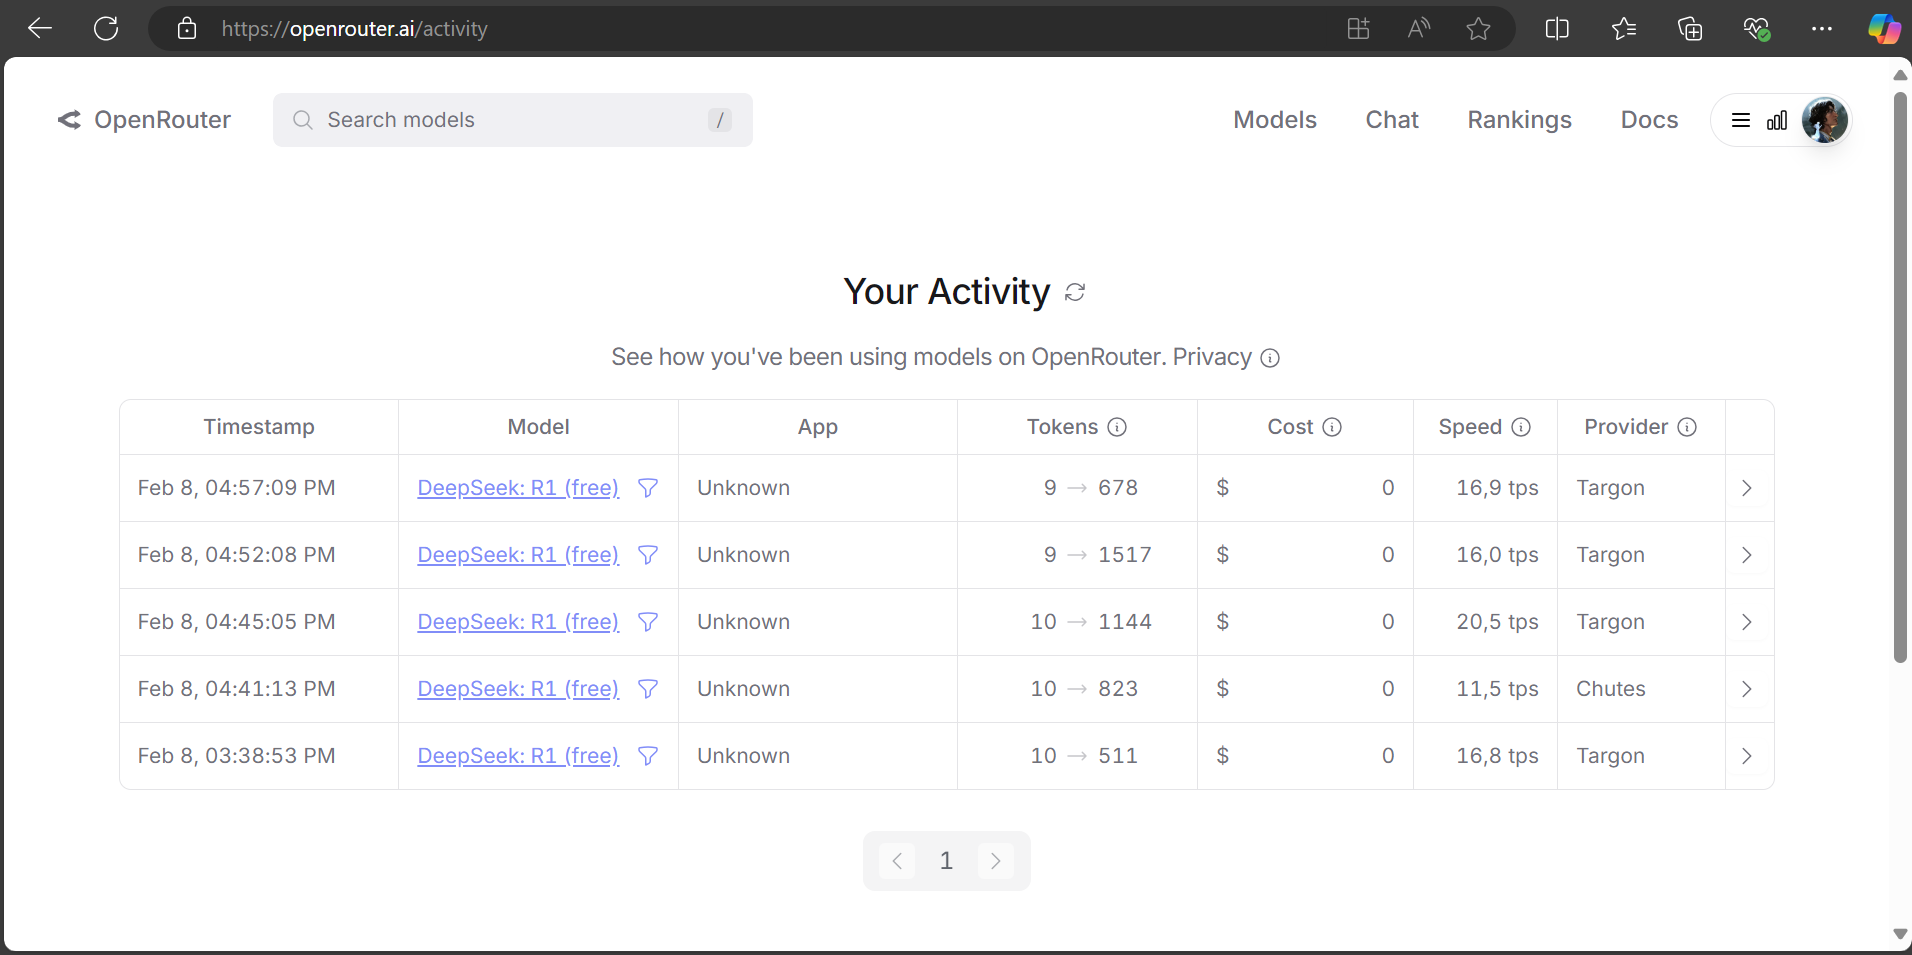  

Podemos ver más detalles sobre el proveedor, entre ellos la _data policy_. En general **está activado el entrenamiento con tus preguntas**.  
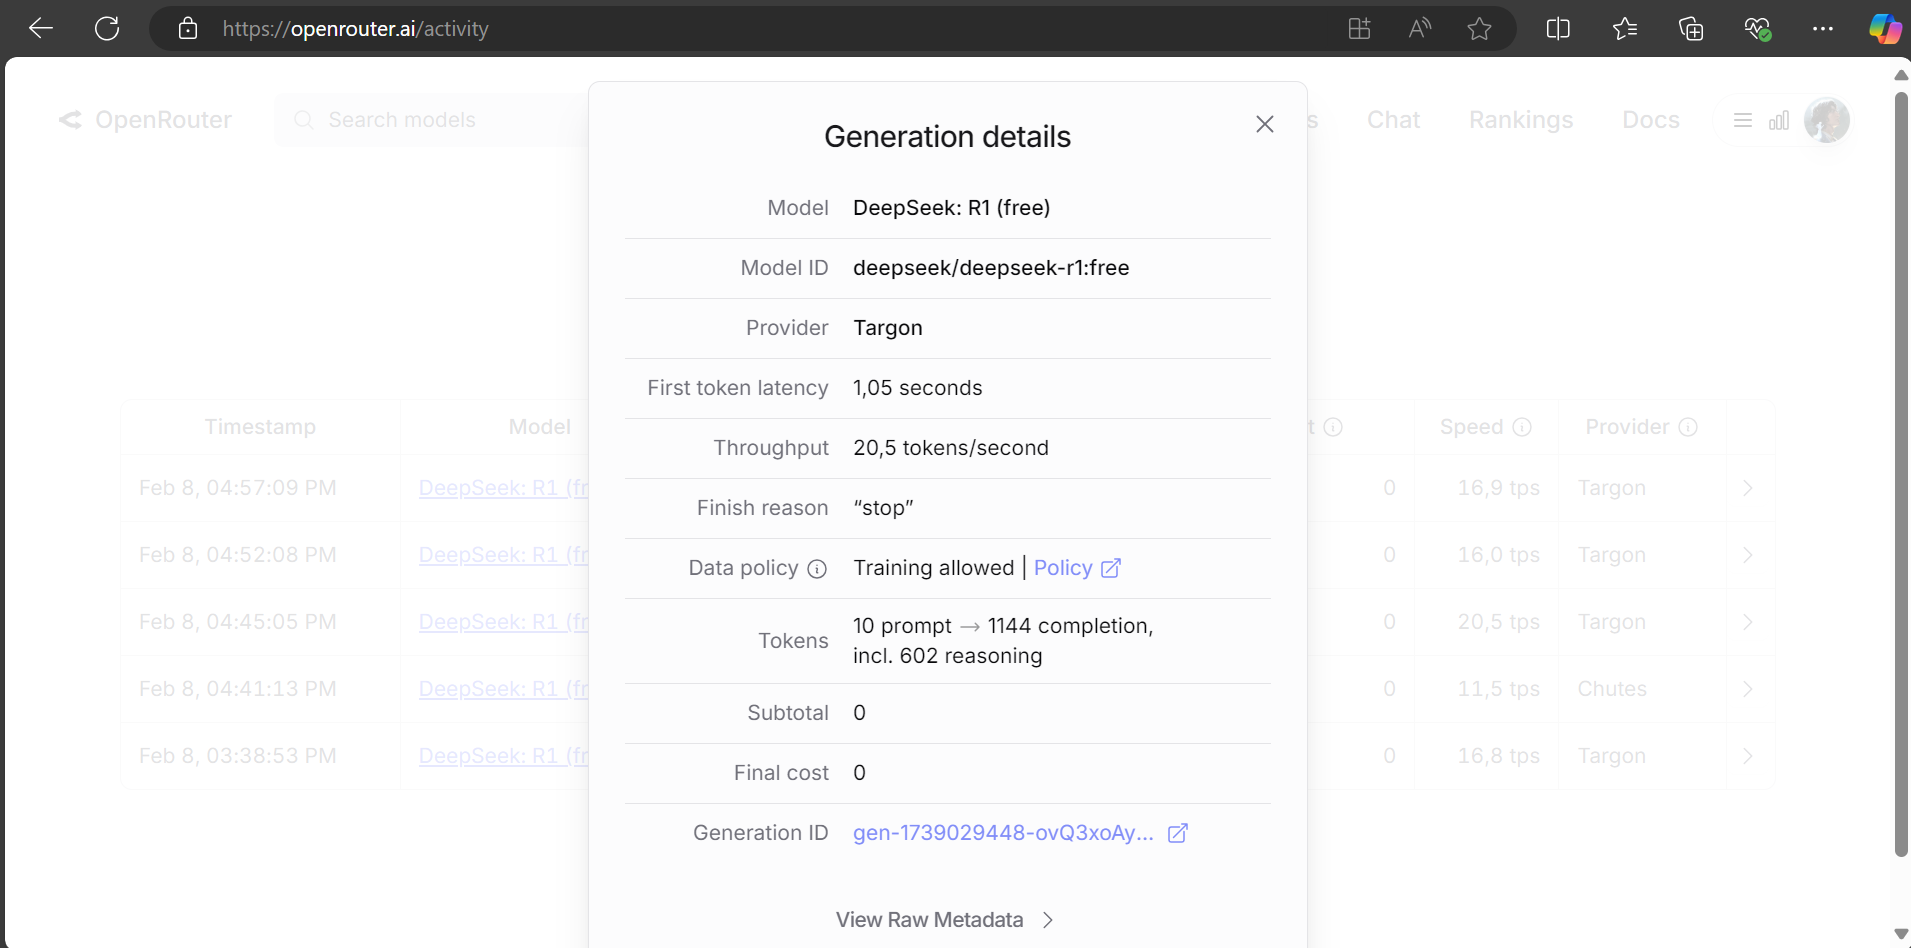  

Se puede desactivar el entrenamiento con tus datos, pero, al menos en las pruebas que he hecho yo, esto genera un error al llamar a los modelos.  

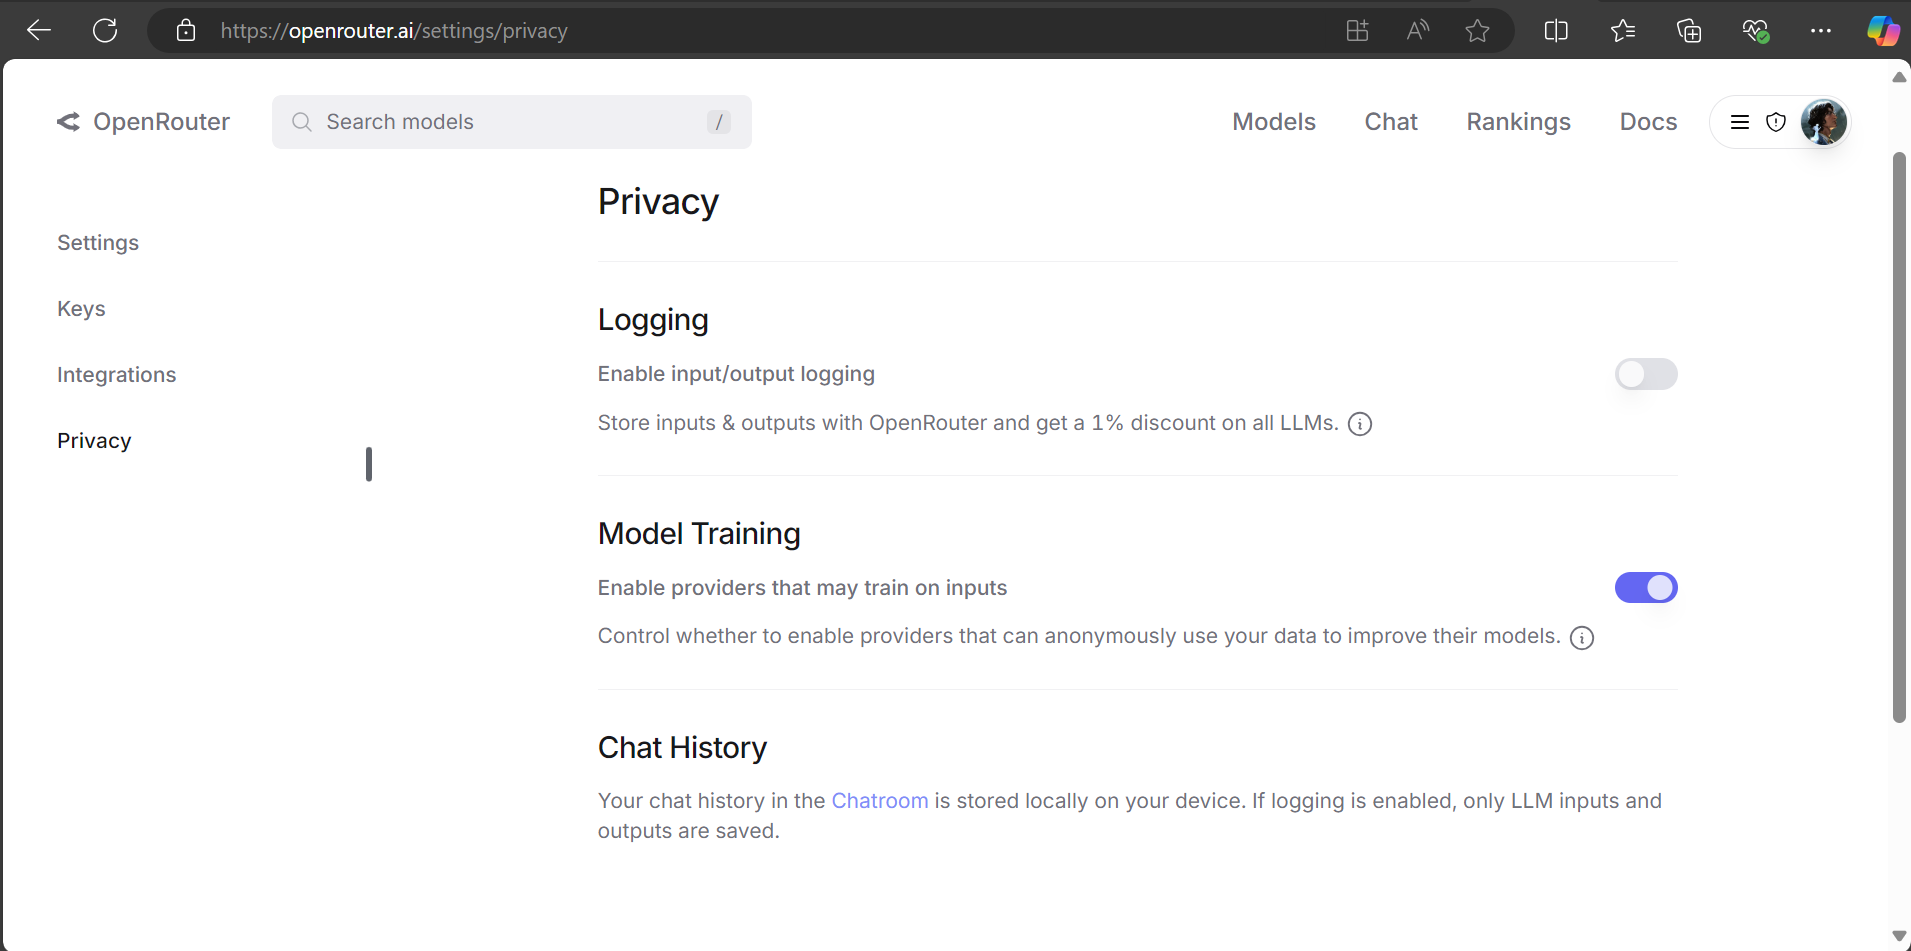

### El problema del _rate limit_  

Me he encontrado un problema. Haciendo una serie de llamadas seguidas, me salta un error de tipo _rate limit_. El límite de los modelos gratis es 20 llamadas por minuto y 200 por día.  

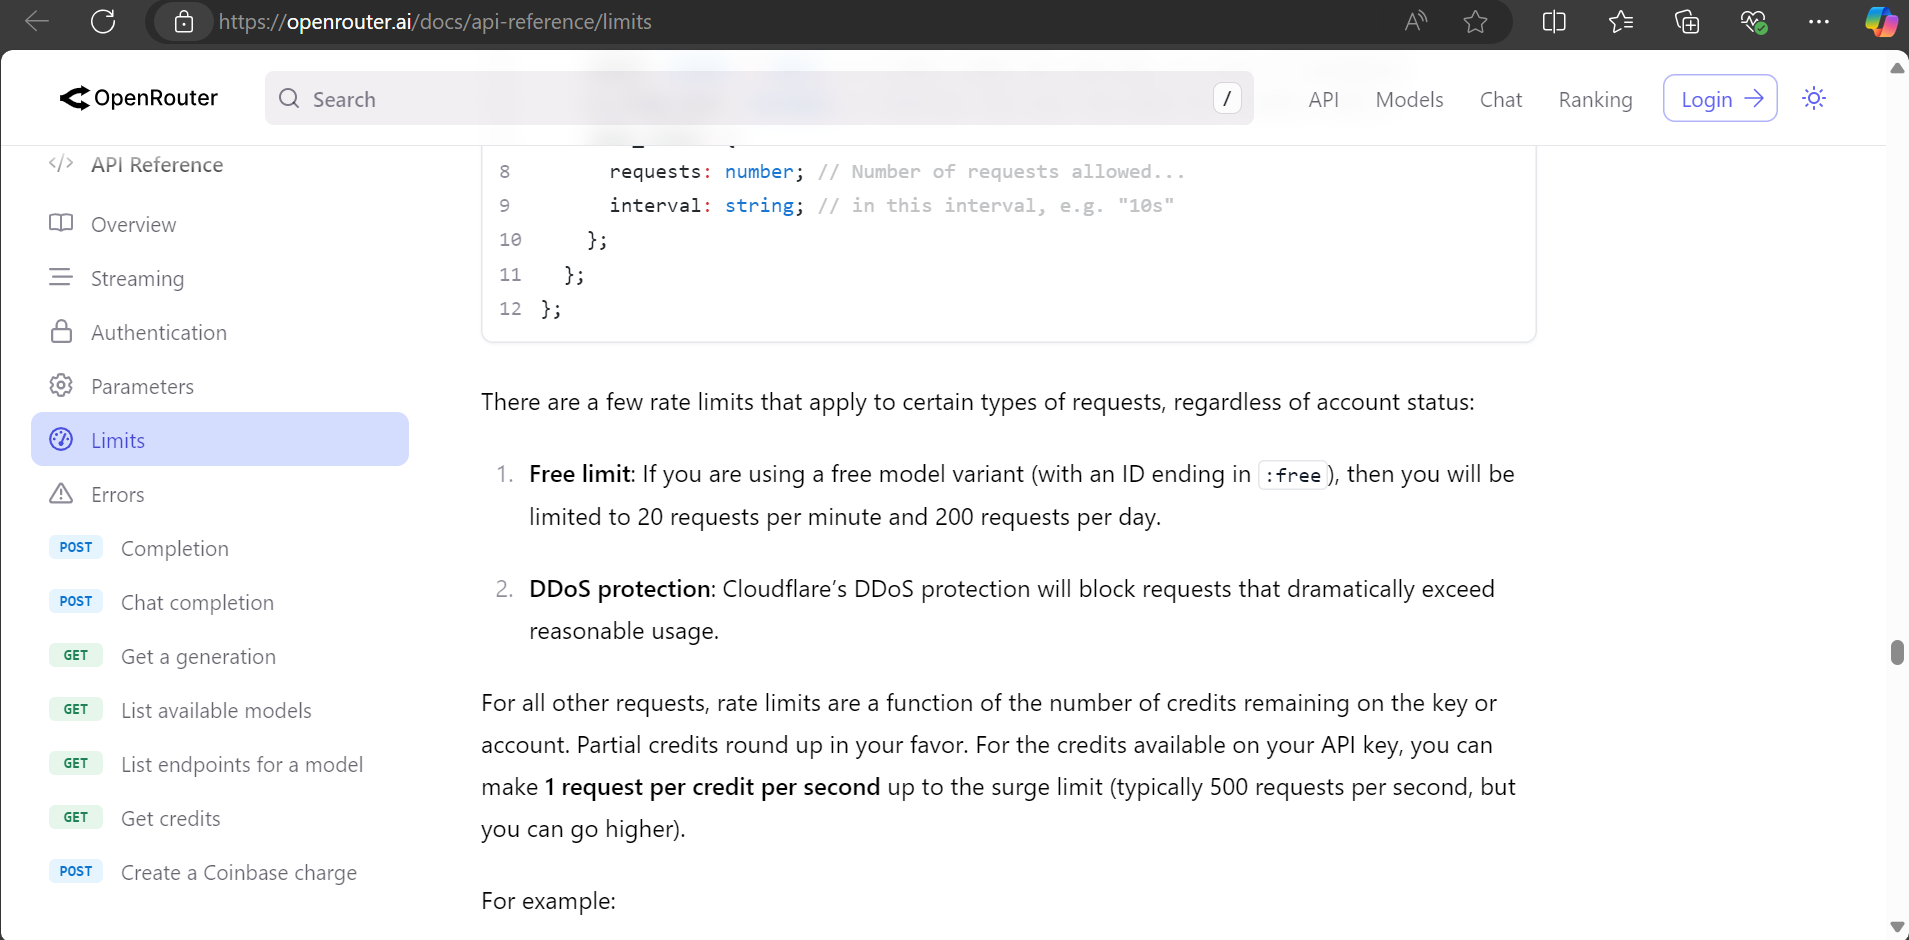

Poniendo en la terminal lo siguiente, pueden verse más detalles:  

curl -k -X GET 'https://openrouter.ai/api/v1/auth/key' -H 'Authorization: Bearer <API key>'

## Con https://console.groq.com/  

Este es otro proveedor de modelos. Tiene un _rate limit_ más amplio que OpenRouter, aunque los modelos gratis que ofrece son sobre todo llamas. El quickstart está a continuación, así como un ejemplo de llanada al modelo:  
https://console.groq.com/docs/quickstart  
https://console.groq.com/docs/rate-limits  

Además, en estos modelos no se utilizarán los prompts para entrenar futuros modelos, tal y como se detalla en los términos y condiciones.

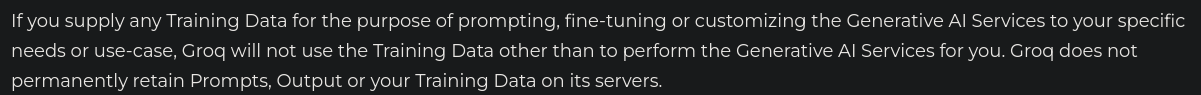

Los modelos gratis disponibles y sus _rate limits_ son los siguientes:  

| MODEL ID                             | RPM | RPD   | TPM   | TPD     | ASH  | ASD   |
|--------------------------------------|-----|-------|-------|---------|------|-------|
| deepseek-r1-distill-llama-70b       | 30  | 1,000 | 6,000 | -       | -    | -     |
| llama-3.3-70b-versatile             | 30  | 1,000 | 6,000 | 100,000 | -    | -     |
| llama-3.3-70b-specdec               | 30  | 1,000 | 6,000 | 100,000 | -    | -     |
| llama-3.2-1b-preview                | 30  | 7,000 | 7,000 | 500,000 | -    | -     |
| llama-3.2-3b-preview                | 30  | 7,000 | 7,000 | 500,000 | -    | -     |
| llama-3.1-8b-instant                | 30  | 14,400| 6,000 | 500,000 | -    | -     |
| llama3-70b-8192                     | 30  | 14,400| 6,000 | 500,000 | -    | -     |
| llama3-8b-8192                      | 30  | 14,400| 6,000 | 500,000 | -    | -     |
| llama-guard-3-8b                    | 30  | 14,400| 15,000| 500,000 | -    | -     |
| mixtral-8x7b-32768                  | 30  | 14,400| 5,000 | 500,000 | -    | -     |
| gemma2-9b-it                        | 30  | 14,400| 15,000| 500,000 | -    | -     |
| whisper-large-v3                    | 20  | 2,000 | -     | -       | 7,200| 28,800|
| whisper-large-v3-turbo              | 20  | 2,000 | -     | -       | 7,200| 28,800|
| distil-whisper-large-v3-en          | 20  | 2,000 | -     | -       | 7,200| 28,800|
| llama-3.2-11b-vision-preview        | 30  | 7,000 | 7,000 | 500,000 | -    | -     |
| llama-3.2-90b-vision-preview        | 15  | 3,500 | 7,000 | 250,000 | -    | -     |




In [1]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.1 MB/s eta 0:00:00


In [3]:
import os
from groq import Groq

client = Groq(
    api_key="<API key>",
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Tell me a joke about physics",
        }
    ],
    model="llama-3.3-70b-versatile",
)

print(chat_completion.choices[0].message.content)

Why did the physicist break up with his girlfriend?

Because he found her mass attractive, but her charge was always negative.
